In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt

In [38]:
def is_int(val):
    try:
        int(val)
        return True
    except ValueError:
        return False

merged_df = pd.read_csv('merged_df.csv',index_col=0)
mask = merged_df['zip'].apply(is_int)
merged_df = merged_df.loc[mask]
merged_df['zip'] = merged_df['zip'].astype(int)
merged_df['Sample Date'] = pd.to_datetime(merged_df['Sample Date'])
merged_df

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name,Lat,Lon,Name,Street Dir,Street Num,Lat GPS,Lon GPS,zip
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00,3800,S,CAMPBELL AVE,3800.0,2500.0,CAMPBELL AVE,W,2500.0,41.817917,-87.689244,60609
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94,4500,N,MERRIMAC AVE,4500.0,6234.0,MERRIMAC AVE,W,6234.0,41.963902,-87.780975,60706
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0,41.927523,-87.713810,60647
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0,41.927523,-87.713810,60647
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00,6100,S,LANGLEY AVE,6100.0,700.0,LANGLEY AVE,E,700.0,41.779099,-87.610813,60637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37576,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30,4900,W,KAMERLING AVE,1332.0,4900.0,KAMERLING AVE,N,1332.0,41.906278,-87.748204,60651
37577,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50,1400,N,NOBLE ST,1400.0,1400.0,NOBLE ST,W,1400.0,41.907515,-87.662221,60642
37578,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50,800,N,PAULINA ST,800.0,1700.0,PAULINA ST,W,1700.0,41.896601,-87.669591,60622
37579,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50,1700,N,PARKSIDE AVE,1700.0,5632.0,PARKSIDE AVE,W,5632.0,41.912972,-87.766186,60639


In [39]:
df = pd.read_csv('lead_cleaned.csv',index_col=0)
df

,Sample Date,Address,1st Draw,2/3 Min,5 Min
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00
...,...,...,...,...,...
37313,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30
37314,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50
37315,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50
37316,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50


In [40]:
# Load the CSV file into a Pandas DataFrame
zip_code_df = pd.read_excel('zip_code_stats.xlsx')
zip_code_df.head()


,Layer,Name,GEOID,Population,Longitude,Latitude,median_INC_2017-2021,per_capita_INC_2017-2021,major_crime_2018-2022,violent_crime_2018-2022,public_crime_2012-2016,behavioral_ health_hospitalizations_2017,cognitive_difficulty_percent_2017-2021,poverty_rate_percent_2017-2021,high_school_grad_rate_2017-2021,college_grad_rate_2017-2021,non_hispanic_white_percent_2017-2021
0,Zip code,60601,60601,15814,-87.622092,41.885303,123115,137556,1736.752366,148.889510,57.189159,91,1.995805,5.834093,97.917725,88.031149,54.877060
1,Zip code,60602,60602,1261,-87.629148,41.883073,235666,168423,282.033895,25.289746,5.774626,25,0.000000,2.222222,100.000000,82.217782,47.022767
2,Zip code,60603,60603,1288,-87.625509,41.880188,114394,126850,222.284097,27.339711,17.819901,18,2.352941,11.444142,100.000000,93.225806,56.705882
3,Zip code,60604,60604,897,-87.628461,41.878095,67938,83052,158.666298,19.375279,12.152086,28,1.601164,34.061135,100.000000,93.556086,74.963610
4,Zip code,60605,60605,34071,-87.617228,41.867566,112162,85947,1675.218975,246.799483,126.443697,285,2.914663,8.612424,95.316371,78.088010,57.037753


In [41]:
zip_df = pd.read_csv('uszips.csv')
zip_df = zip_df[zip_df['state_id'] == 'IL']
zip_df = zip_df[zip_df['zcta'] == True]
zip_df = zip_df[zip_df['zip'].astype(str).isin(merged_df['zip'].astype(str))]
zip_df = zip_df.reset_index(drop=1)
zip_df.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,60007,42.01431,-87.99828,Elk Grove Village,IL,Illinois,True,NaN,33048.0,704.7,17031,Cook,"{""17031"": 96.01, ""17043"": 3.99}",Cook|DuPage,17031|17043,False,False,America/Chicago
1,60068,42.01276,-87.84435,Park Ridge,IL,Illinois,True,NaN,39531.0,2087.6,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago
2,60077,42.03617,-87.75633,Skokie,IL,Illinois,True,NaN,29238.0,2668.2,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago
3,60301,41.88865,-87.79648,Oak Park,IL,Illinois,True,NaN,2890.0,5728.1,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago
4,60302,41.89480,-87.78983,Oak Park,IL,Illinois,True,NaN,33039.0,4316.3,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago


In [42]:
# find the average lead level of Chicago area
first_draw_avg = df['1st Draw'].mean()
second_draw_avg = df['2/3 Min'].mean()
third_draw_avg = df['5 Min'].mean()
print('first draw average: ', first_draw_avg)
print('2/3 Min: ', second_draw_avg)
print('5 Min: ', third_draw_avg)

first draw average:  6.608298408274827
2/3 Min:  5.93494051128142
5 Min:  4.454800632402594


In [43]:

zip_lead_df = merged_df.groupby('zip')[['1st Draw', '2/3 Min', '5 Min']].mean().reset_index()
zip_lead_df = zip_lead_df.merge(zip_df[['zip', 'population', 'density']], on='zip', how='left')
zip_lead_df = zip_lead_df.dropna().reset_index(drop=True)
Q1 = zip_lead_df[['1st Draw', '2/3 Min', '5 Min']].quantile(0.25)
Q3 = zip_lead_df[['1st Draw', '2/3 Min', '5 Min']].quantile(0.75)
IQR = Q3 - Q1

zip_lead_df = zip_lead_df[~((zip_lead_df[['1st Draw', '2/3 Min', '5 Min']] < (Q1 - 5 * IQR)) | (zip_lead_df[['1st Draw', '2/3 Min', '5 Min']] > (Q3 + 5 * IQR))).any(axis=1)]
zip_lead_df

,zip,1st Draw,2/3 Min,5 Min,population,density
0,60007,1.000000,1.000000,1.000000,33048.0,704.7
1,60068,2.384706,3.767059,2.041765,39531.0,2087.6
2,60077,2.627273,3.163636,1.336364,29238.0,2668.2
3,60301,1.000000,1.000000,1.000000,2890.0,5728.1
4,60302,3.492069,3.756552,2.447126,33039.0,4316.3
...,...,...,...,...,...,...
70,60803,0.700000,0.500000,0.500000,22329.0,1111.7
71,60804,7.815909,4.940909,3.986364,84905.0,4607.1
72,60805,4.451494,6.021879,3.090237,19884.0,2252.7
73,60827,12.347869,8.477049,4.822951,26010.0,1429.1


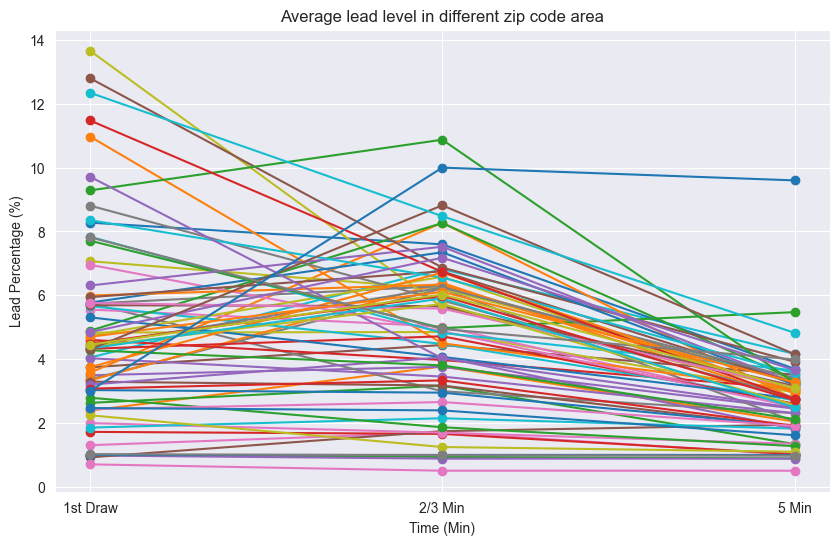

In [44]:
plt.figure(figsize=(10,6))

for i in range(71):
    plt.plot(['1st Draw', '2/3 Min', '5 Min'], zip_lead_df.iloc[i, 1:4], marker='o', label=zip_lead_df.iloc[i, 0])

plt.xlabel('Time (Min)')
plt.ylabel('Lead Percentage (%)')
plt.title('Average lead level in different zip code area')

plt.show()

In [45]:
time_graph_df = merged_df[['Sample Date', '2/3 Min', 'zip']]

Q1 = time_graph_df['2/3 Min'].quantile(0.25)
Q3 = time_graph_df['2/3 Min'].quantile(0.75)
IQR = Q3 - Q1

filter = (time_graph_df['2/3 Min'] >= Q1 - 5 * IQR) & (time_graph_df['2/3 Min'] <= Q3 + 5 *IQR)
time_graph_df = time_graph_df.loc[filter]

time_graph_df['Year'] = time_graph_df['Sample Date'].dt.year
time_graph_df = time_graph_df.groupby(['Year', 'zip'])['2/3 Min'].mean().reset_index()


time_graph_df

,Year,zip,2/3 Min
0,2016,46320,2.700000
1,2016,60068,1.940000
2,2016,60302,3.044000
3,2016,60406,2.900000
4,2016,60453,4.328571
...,...,...,...
544,2023,60712,5.568421
545,2023,60714,7.266667
546,2023,60804,5.244444
547,2023,60805,5.440000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


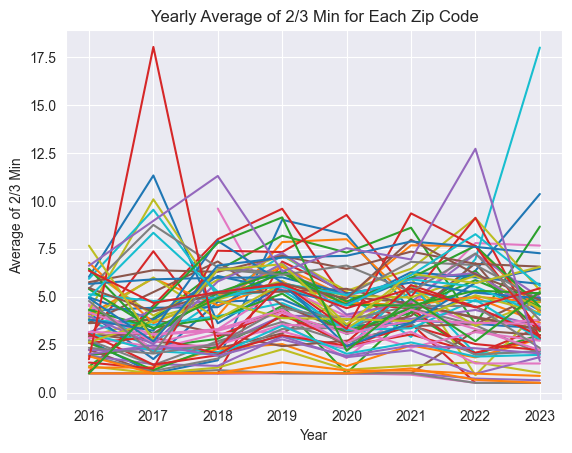

In [46]:
fig, ax = plt.subplots()
for name, group in time_graph_df.groupby('zip'):
    ax.plot(group['Year'], group['2/3 Min'],)
plt.legend().remove()
plt.title('Yearly Average of 2/3 Min for Each Zip Code')
plt.xlabel('Year')
plt.ylabel('Average of 2/3 Min')
plt.show()

C:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly condition

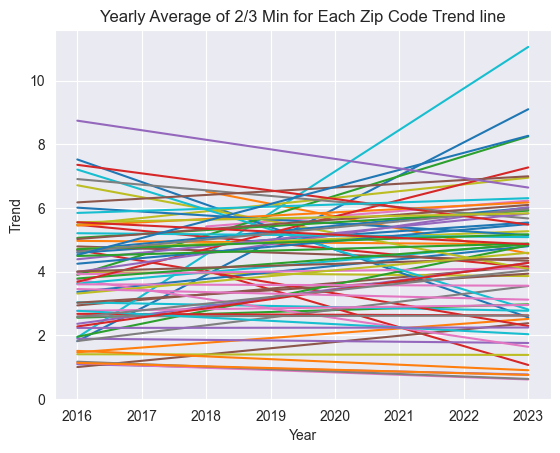

In [47]:
fig, ax = plt.subplots()
for name, group in time_graph_df.groupby('zip'):
    z = np.polyfit(group['Year'], group['2/3 Min'], 1)
    p = np.poly1d(z)
    ax.plot(group['Year'], p(group['Year']),)
plt.legend().remove()
plt.title('Yearly Average of 2/3 Min for Each Zip Code Trend line')
plt.xlabel('Year')
plt.ylabel('Trend')
plt.show()

In [48]:
population_df = zip_lead_df[['zip', '2/3 Min', 'population']]
population_df=population_df.sort_values(by=['population']).reset_index(drop=True)
population_df

,zip,2/3 Min,population
0,60602,1.654255,1142.0
1,60301,1.000000,2890.0
2,60606,1.739806,3298.0
3,60456,4.847414,4324.0
4,61834,10.000000,8247.0
...,...,...,...
66,60647,6.733994,85564.0
67,60632,4.818767,87395.0
68,60639,6.749444,89037.0
69,60618,5.019396,95078.0


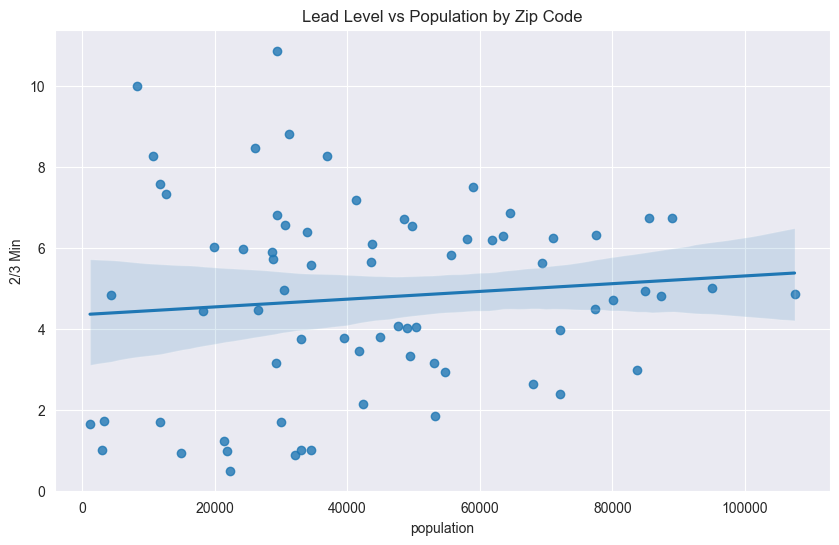

In [49]:
plt.figure(figsize=(10, 6))
sns.regplot(data=population_df, x='population', y='2/3 Min')
plt.title('Lead Level vs Population by Zip Code')
plt.show()

In [50]:
density_df = zip_lead_df[['zip', '2/3 Min', 'density']]
density_df = density_df.sort_values(by=['density']).reset_index(drop=True)
density_df

,zip,2/3 Min,density
0,61834,10.000000,29.8
1,60633,7.346195,502.0
2,60007,1.000000,704.7
3,60501,7.594565,1043.5
4,60803,0.500000,1111.7
...,...,...,...
66,60660,3.801048,13631.6
67,60601,0.931818,14706.9
68,60610,2.144706,14725.7
69,60654,0.985217,15577.5


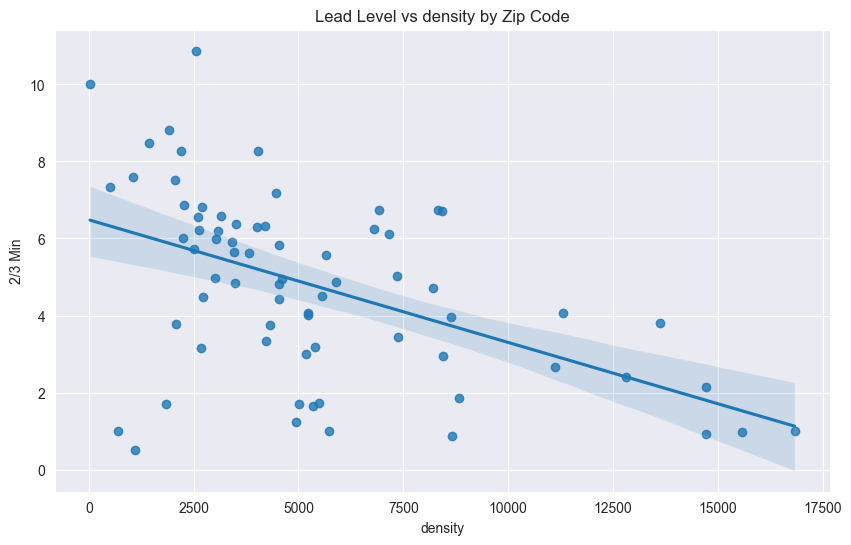

In [51]:
plt.figure(figsize=(10, 6))
sns.regplot(data=density_df, x='density', y='2/3 Min')
plt.title('Lead Level vs density by Zip Code')
plt.show()

In [52]:
detail_zip_df = merged_df.groupby('zip')[['1st Draw', '2/3 Min', '5 Min']].mean().reset_index()

zip_code_df = zip_code_df.rename(columns={'Name': 'zip'})

detail_zip_df = detail_zip_df.merge(zip_code_df[['zip','median_INC_2017-2021','per_capita_INC_2017-2021','major_crime_2018-2022','violent_crime_2018-2022','public_crime_2012-2016', 'behavioral_ health_hospitalizations_2017', 'cognitive_difficulty_percent_2017-2021', 'poverty_rate_percent_2017-2021','high_school_grad_rate_2017-2021', 'college_grad_rate_2017-2021', 'non_hispanic_white_percent_2017-2021']], on='zip', how='left')
detail_zip_df = detail_zip_df.dropna().reset_index(drop=1)
detail_zip_df = detail_zip_df.drop([14,44]).reset_index(drop=1)
detail_zip_df.to_csv('detail_zip.csv')
detail_zip_df.head()

,zip,1st Draw,2/3 Min,5 Min,median_INC_2017-2021,per_capita_INC_2017-2021,major_crime_2018-2022,violent_crime_2018-2022,public_crime_2012-2016,behavioral_ health_hospitalizations_2017,cognitive_difficulty_percent_2017-2021,poverty_rate_percent_2017-2021,high_school_grad_rate_2017-2021,college_grad_rate_2017-2021,non_hispanic_white_percent_2017-2021
0,60601,1.004545,0.931818,0.884848,123115.0,137556.0,1736.752366,148.889510,57.189159,91.0,1.995805,5.834093,97.917725,88.031149,54.877060
1,60602,1.717660,1.654255,1.021064,235666.0,168423.0,282.033895,25.289746,5.774626,25.0,0.000000,2.222222,100.000000,82.217782,47.022767
2,60605,0.977037,0.878519,0.878519,112162.0,85947.0,1675.218975,246.799483,126.443697,285.0,2.914663,8.612424,95.316371,78.088010,57.037753
3,60606,0.918447,1.739806,1.941748,130196.0,133605.0,529.774357,58.453847,20.751522,66.0,0.363857,8.550637,99.266177,91.794530,59.642207
4,60607,1.993191,1.692766,1.342979,109634.0,65052.0,2208.933790,266.924943,266.380039,651.0,4.155217,16.888971,96.620012,78.920985,51.797266


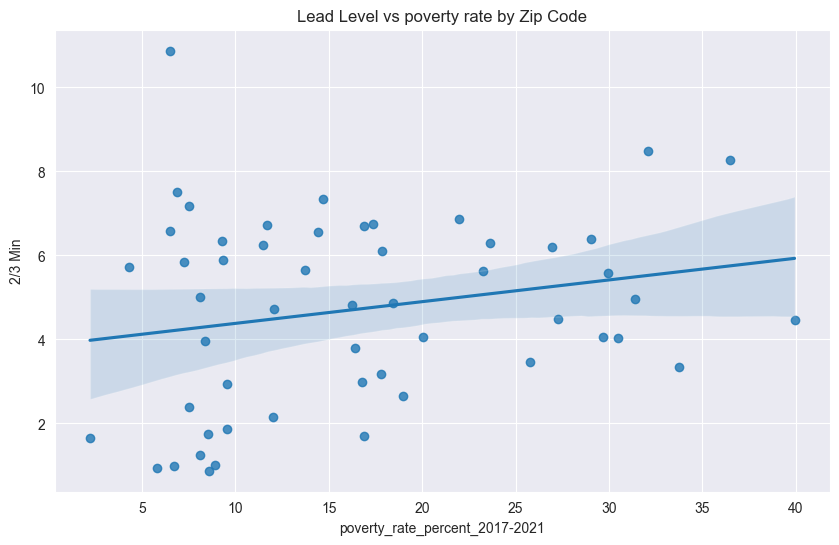

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='poverty_rate_percent_2017-2021', y='2/3 Min')
plt.title('Lead Level vs poverty rate by Zip Code')
plt.show()

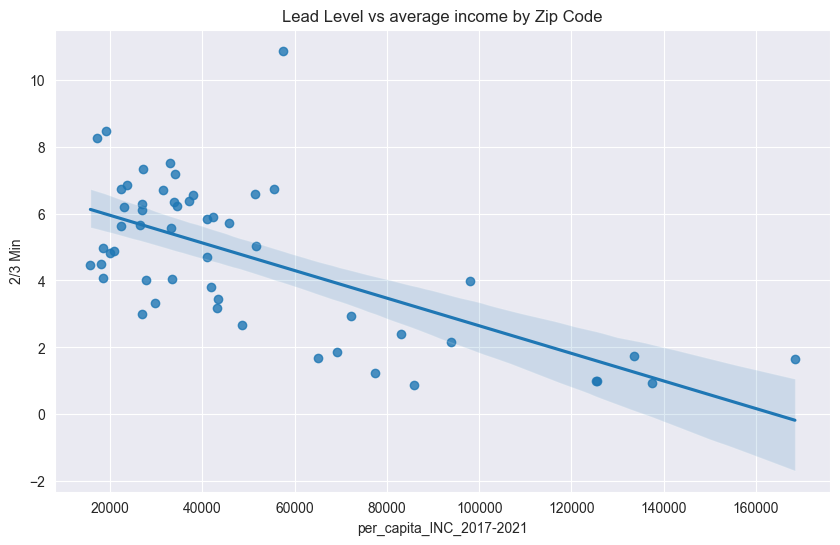

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='per_capita_INC_2017-2021', y='2/3 Min')
plt.title('Lead Level vs average income by Zip Code')
plt.show()

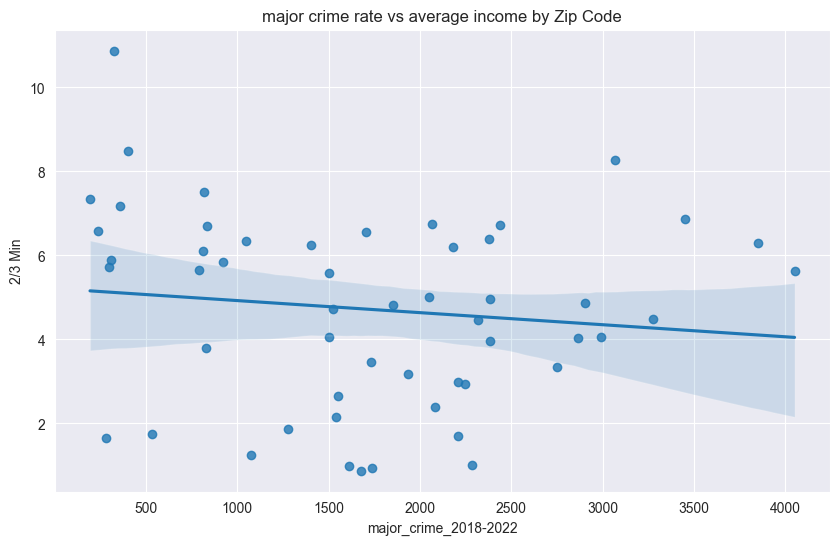

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='major_crime_2018-2022', y='2/3 Min')
plt.title('major crime rate vs average income by Zip Code')
plt.show()

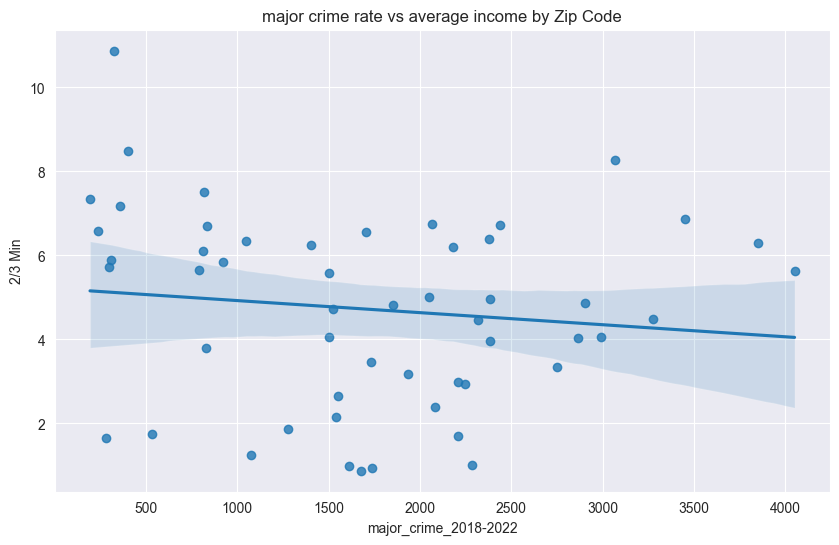

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='major_crime_2018-2022', y='2/3 Min')
plt.title('major crime rate vs average income by Zip Code')
plt.show()

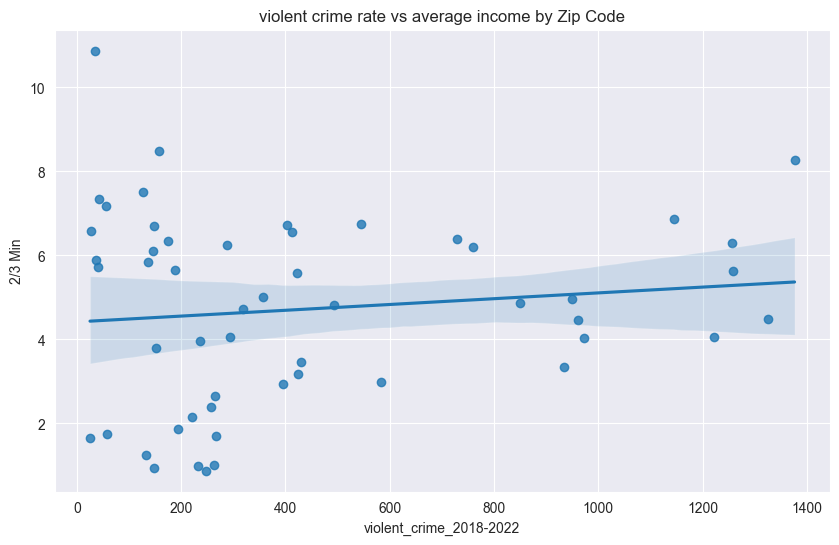

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='violent_crime_2018-2022', y='2/3 Min')
plt.title('violent crime rate vs average income by Zip Code')
plt.show()

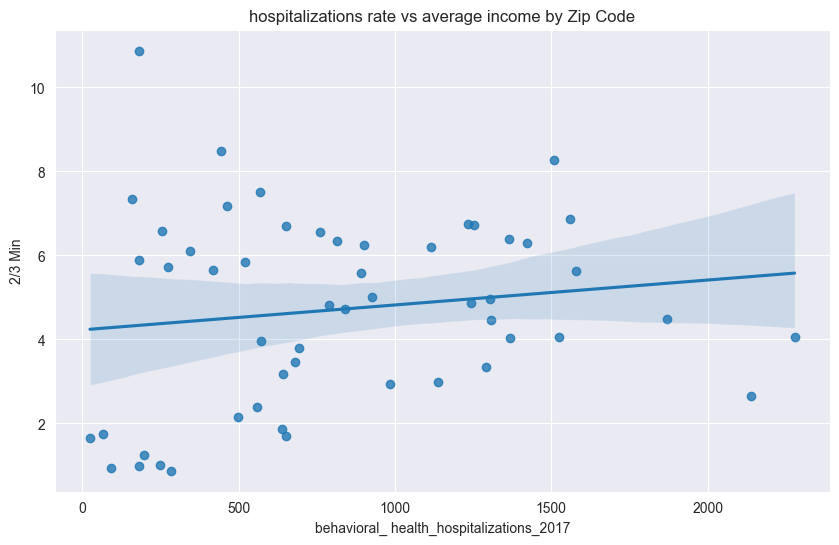

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='behavioral_ health_hospitalizations_2017', y='2/3 Min')
plt.title('hospitalizations rate vs average income by Zip Code')
plt.show()

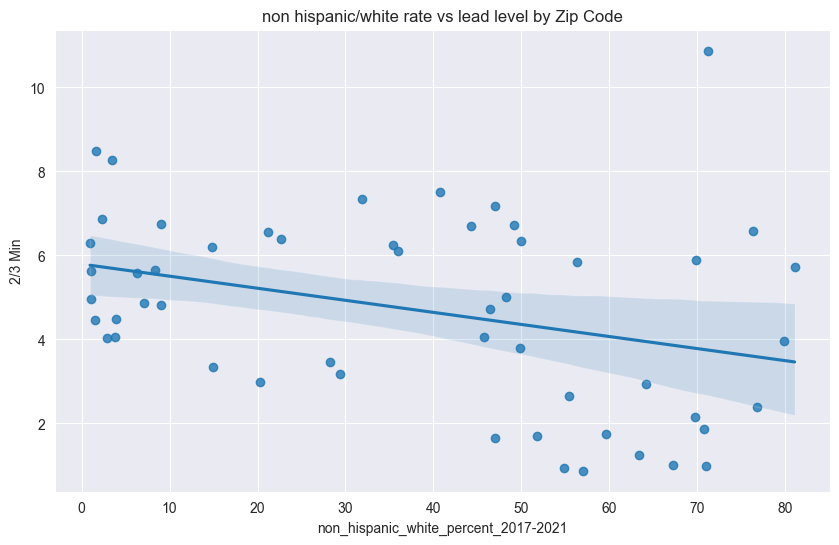

In [27]:

plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='non_hispanic_white_percent_2017-2021', y='2/3 Min')
plt.title('non hispanic/white rate vs lead level by Zip Code')
plt.show()

In [28]:
merged_short_df = merged_df[['Sample Date', 'Address', '1st Draw', '2/3 Min', '5 Min', 'Lat GPS', 'Lon GPS', 'zip']]
merged_short_df.columns

Index(['Sample Date', 'Address', '1st Draw', '2/3 Min', '5 Min', 'Lat GPS',
       'Lon GPS', 'zip'],
      dtype='object')

In [29]:
merged_short_df.describe()

,Sample Date,1st Draw,2/3 Min,5 Min,Lat GPS,Lon GPS,zip
count,35636,35636.000000,35636.000000,35636.00000,35636.000000,35636.000000,35636.000000
mean,2020-04-17 16:33:47.709058048,6.551706,5.877865,4.49153,41.874588,-87.690151,60600.189668
min,2016-01-27 00:00:00,0.500000,0.500000,0.50000,40.194334,-87.957020,46320.000000
25%,2019-03-14 00:00:00,1.000000,1.000000,1.00000,41.777412,-87.728550,60620.000000
50%,2019-10-21 00:00:00,2.200000,2.400000,1.40000,41.914791,-87.682660,60636.000000
75%,2021-10-26 03:00:00,4.200000,6.200000,2.90000,41.960264,-87.652394,60647.000000
max,2023-08-28 09:00:00,10000.000000,13000.000000,55000.00000,42.022108,-87.528170,61834.000000
std,NaN,89.861212,85.036219,293.05490,0.103259,0.059874,727.893420


In [30]:
# convert it to numeric first
merged_short_df['5 Min'] = pd.to_numeric(merged_short_df['5 Min'], errors='coerce')
# Sort the DataFrame by '5 Min' column in descending order
sorted_df = merged_short_df.sort_values(by='5 Min', ascending=False)

sorted_df.head(60)

C:\Users\harry\AppData\Local\Temp\ipykernel_5568\186077071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_short_df['5 Min'] = pd.to_numeric(merged_short_df['5 Min'], errors='coerce')


,Sample Date,Address,1st Draw,2/3 Min,5 Min,Lat GPS,Lon GPS,zip
31971,2022-09-21 08:00:00,3500 W THOMAS ST,10000.0,13000.0,55000.0,41.902058,-87.713810,60651
24558,2020-12-10 00:00:00,9700 S MERRION AVE,390.0,8000.0,5800.0,41.718342,-87.574012,60617
36256,2023-06-15 07:41:00,5800 S CAMPBELL AVE,200.0,110.0,720.0,41.784162,-87.689244,60636
36255,2023-06-15 07:41:00,5800 S CAMPBELL AVE,200.0,110.0,720.0,41.784162,-87.689244,60636
36134,2023-06-07 18:00:00,3000 W FULLERTON AVE,1400.0,2700.0,420.0,41.925704,-87.701527,60647
36133,2023-06-07 18:00:00,3000 W FULLERTON AVE,1400.0,2700.0,420.0,41.925704,-87.701527,60647
10170,2019-03-31 00:00:00,6900 N TONTY AVE,2.0,460.0,240.0,42.007556,-87.778912,60714
31647,2022-08-31 06:00:00,1500 S HAMLIN AVE,240.0,210.0,180.0,41.856734,-87.721180,60623
35822,2023-05-19 06:15:00,12000 S PRINCETON AVE,140.0,170.0,180.0,41.679524,-87.635197,60628
25860,2021-06-28 00:00:00,4800 S KEELER AVE,2.6,2.8,170.0,41.801040,-87.731007,60632


In [31]:
columns_to_process = ['1st Draw', '2/3 Min', '5 Min']
# Iterate through the columns
for column in columns_to_process:
    # Calculate the mean
    column_mean = merged_short_df[column].mean()
    # Set the limit value
    limit_value = column_mean + 15
    # Replace values greater than the limit with the limit value
    merged_short_df[column] = merged_short_df[column].where(merged_short_df[column] <= limit_value, limit_value)

merged_short_df.describe()

C:\Users\harry\AppData\Local\Temp\ipykernel_5568\2860437004.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_short_df[column] = merged_short_df[column].where(merged_short_df[column] <= limit_value, limit_value)


,Sample Date,1st Draw,2/3 Min,5 Min,Lat GPS,Lon GPS,zip
count,35636,35636.000000,35636.000000,35636.000000,35636.000000,35636.000000,35636.000000
mean,2020-04-17 16:33:47.709058048,3.565901,4.573882,2.588065,41.874588,-87.690151,60600.189668
min,2016-01-27 00:00:00,0.500000,0.500000,0.500000,40.194334,-87.957020,46320.000000
25%,2019-03-14 00:00:00,1.000000,1.000000,1.000000,41.777412,-87.728550,60620.000000
50%,2019-10-21 00:00:00,2.200000,2.400000,1.400000,41.914791,-87.682660,60636.000000
75%,2021-10-26 03:00:00,4.200000,6.200000,2.900000,41.960264,-87.652394,60647.000000
max,2023-08-28 09:00:00,21.551706,20.877865,19.491530,42.022108,-87.528170,61834.000000
std,NaN,4.121460,5.102081,3.119328,0.103259,0.059874,727.893420


In [32]:
merged_short_df.iloc[20000:20060]

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Lat GPS,Lon GPS,zip
21191,2019-12-26,8200 S MORGAN ST,3.800000,1.3,1.1,41.743657,-87.652394,60620
21192,2019-12-26,1500 N CLEVELAND AVE,1.000000,1.0,1.0,41.909334,-87.640111,60610
21193,2019-12-26,600 W WILLOW ST,1.000000,1.0,1.0,41.913699,-87.642567,60614
21194,2019-12-26,10700 S MAPLEWOOD AVE,3.200000,9.7,1.9,41.701464,-87.690030,60655
21195,2019-12-26,2100 W CORTEZ ST,1.000000,1.0,1.0,41.900821,-87.679417,60622
21196,2019-12-26,3300 W 114TH ST,3.900000,2.6,1.2,41.689650,-87.708897,60655
21197,2019-12-26,1100 N MARSHFIELD AVE,1.700000,1.0,1.0,41.902058,-87.667920,60622
21198,2019-12-26,8000 S MOZART ST,4.100000,4.4,4.3,41.747033,-87.697400,60652
21199,2019-12-26,500 W 97TH ST,7.000000,1.5,1.1,41.718342,-87.640111,60620
21200,2019-12-26,2700 W GREGORY ST,5.900000,18.0,2.3,41.982637,-87.694157,60659


In [33]:
# Group by 'zip' and calculate the mean for each group
grouped_df = merged_short_df.groupby('zip').mean(numeric_only=True).reset_index()

In [34]:
grouped_df.describe()

,zip,1st Draw,2/3 Min,5 Min,Lat GPS,Lon GPS
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,60418.552632,3.429403,4.422765,2.579408,41.836976,-87.699241
std,1651.675234,1.376759,2.079815,1.229173,0.217118,0.076096
min,46320.000000,0.700000,0.500000,0.500000,40.194334,-87.957020
25%,60607.750000,2.610698,2.966449,1.879674,41.779509,-87.757168
50%,60627.000000,3.724078,4.599912,2.689175,41.881153,-87.695840
75%,60647.500000,4.149177,5.900144,3.077062,41.945725,-87.649829
max,61834.000000,7.662642,10.000000,9.600000,42.015103,-87.536846


In [35]:
gdf2 = gpd.read_file("boundaries-zipcode.geojson")

C:\Users\harry\AppData\Local\Temp\ipykernel_5568\3674750520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_short_df['zip'] = merged_short_df['zip'].astype(str)


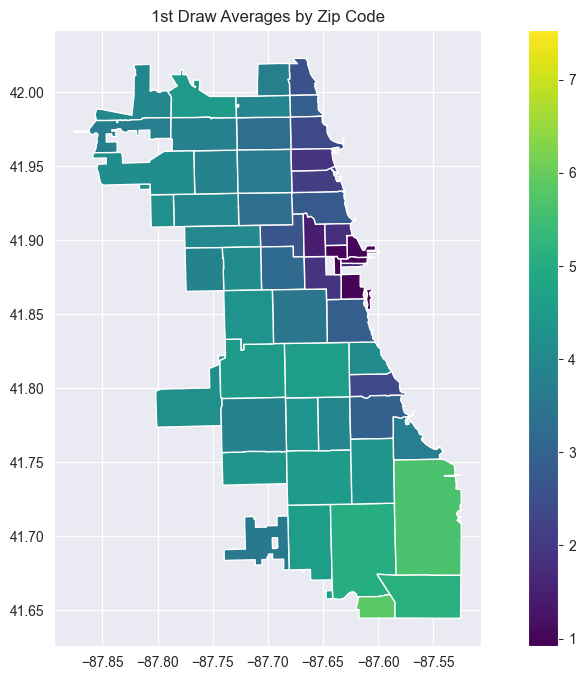

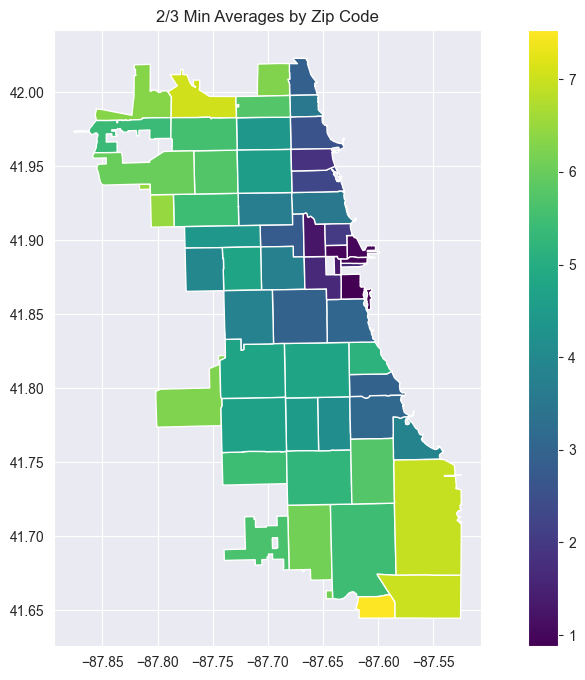

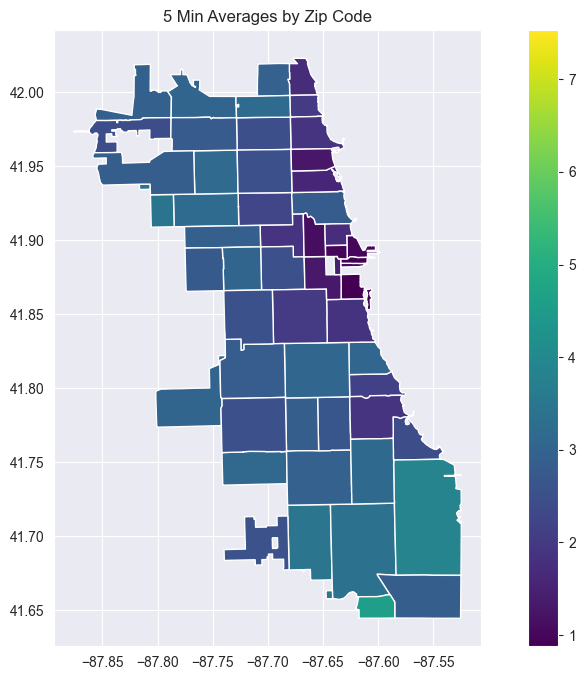

In [36]:
# Convert 'zip' column to string type in both DataFrames
gdf2['zip'] = gdf2['zip'].astype(str)
merged_short_df['zip'] = merged_short_df['zip'].astype(str)
# Group by 'zip' and calculate mean for '1st Draw', '2/3 Min', '5 Min'
grouped_df = merged_short_df.groupby('zip').agg({
    '1st Draw': 'mean',
    '2/3 Min': 'mean',
    '5 Min': 'mean'
}).reset_index()
# Merge GeoPandas DataFrame with the grouped averages
merged_gdf = gdf2.merge(grouped_df, on='zip', how='left')
# Find the maximum value among the three columns
max_value = merged_gdf[['1st Draw', '2/3 Min', '5 Min']].max().max()
# Plott the heatmap for '1st Draw'
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(column='1st Draw', ax=ax, legend=True, cmap='viridis', vmax=max_value)
ax.set_title('1st Draw Averages by Zip Code')
plt.show()
# Plot the heatmap for '2/3 Min'
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(column='2/3 Min', ax=ax, legend=True, cmap='viridis', vmax=max_value)
ax.set_title('2/3 Min Averages by Zip Code')
plt.show()
# Plot the heatmap for '5 Min'
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(column='5 Min', ax=ax, legend=True, cmap='viridis', vmax=max_value)
ax.set_title('5 Min Averages by Zip Code')
plt.show()